<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import csv


plt.style.use('bmh')
sns.set_style('whitegrid')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 2000)


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%autosave 10

Autosaving every 10 seconds


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

In [3]:
# A:
house.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

<b>MSZoning</b>: check for non-residential houses. C is probably commercial and should be dropped.

In [4]:
house.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [5]:
house.loc[house.MSZoning  == 'C (all)']


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,6,1910,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Rec,1046,Unf,0,168,1214,GasW,Ex,N,SBrkr,1260,1031,0,2291,0,1,2,0,4,2,TA,9,Typ,1,Gd,Detchd,1900.0,Unf,2,506,TA,TA,Y,0,0,0,0,99,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
557,558,50,C (all),60.0,11040,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,6,1920,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,637,Unf,0,0,637,GasA,Gd,Y,SBrkr,897,439,0,1336,0,0,1,1,3,1,TA,7,Typ,0,NaN,CarPort,1994.0,Unf,1,570,TA,TA,Y,0,47,120,0,0,0,NaN,NaN,NaN,0,9,2006,COD,Normal,108000
711,712,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,7,1900,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Stone,TA,TA,Mn,Unf,0,Unf,0,859,859,GasA,Gd,Y,SBrkr,859,319,0,1178,0,0,1,0,2,1,TA,7,Typ,0,NaN,Detchd,1964.0,RFn,1,384,TA,TA,N,68,0,98,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,102776
812,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,5,5,1952,1952,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,540,540,GasA,TA,N,FuseA,1044,0,0,1044,0,0,1,0,2,1,Fa,4,Typ,0,NaN,Basment,1952.0,Unf,2,504,TA,TA,N,0,0,0,0,0,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1279,1280,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,4,1920,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,

In [6]:
house = house[house.MSZoning != 'C (all)']
house.MSZoning.unique()


array(['RL', 'RM', 'FV', 'RH'], dtype=object)

In [7]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1450.000000,1450.000000,1191.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1442.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1371.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,731.364138,56.903448,70.052897,10523.831724,6.114483,5.582069,1971.593103,1985.049655,104.404300,445.162759,46.870345,567.375862,1059.408966,1164.773103,347.394483,5.531034,1517.698621,0.427586,0.057241,1.568966,0.384828,2.870345,1.046207,6.522069,0.616552,1978.627279,1.770345,473.277931,94.826897,46.537931,21.536552,3.433103,15.096552,2.777931,43.365517,6.312414,2007.812414,181654.942069
std,421.554345,42.265033,24.301013,10012.185355,1.372860,1.107330,30.022696,20.552319,181.486539,456.353871,161.828458,442.584978,439.207322,386.646095,437.094261,46.932966,525.154207,0.519394,0.238249,0.549549,0.503450,0.814645,0.219643,1.625324,0.644991,24.592779,0.745136,212.687621,125.560863,65.222761,60.838826,29.416948,55.893399,40.315051,497.636495,2.698244,1.326321,79176.485241
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,366.250000,20.000000,59.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.500000,0.000000,0.000000,1131.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.500000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,731.500000,50.000000,70.000000,9496.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,475.000000,992.000000,1088.000000,0.000000,0.000000,1466.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163945.000000
75%,1096.750000,70.000000,80.000000,11613.500000,7.000000,6.000000,2001.000000,2004.000000,166.750000,713.750000,0.000000,808.000000,1301.500000,1392.000000,728.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
house.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 81 columns):
Id               1450 non-null int64
MSSubClass       1450 non-null int64
MSZoning         1450 non-null object
LotFrontage      1191 non-null float64
LotArea          1450 non-null int64
Street           1450 non-null object
Alley            89 non-null object
LotShape         1450 non-null object
LandContour      1450 non-null object
Utilities        1450 non-null object
LotConfig        1450 non-null object
LandSlope        1450 non-null object
Neighborhood     1450 non-null object
Condition1       1450 non-null object
Condition2       1450 non-null object
BldgType         1450 non-null object
HouseStyle       1450 non-null object
OverallQual      1450 non-null int64
OverallCond      1450 non-null int64
YearBuilt        1450 non-null int64
YearRemodAdd     1450 non-null int64
RoofStyle        1450 non-null object
RoofMatl         1450 non-null object
Exterior1st      1450 non-n

## Identifying features that cannot be renovated.

Based the descriptions, selecting columns describing features that <b>cannot</b> be renovated:

    MSSubClass       1450 non-null int64  YES
    MSZoning         1450 non-null object ???? yeah i guess
    LotFrontage      1191 non-null float64 YES
    LotArea          1450 non-null int64  YES
    Street           1450 non-null object  YES
    Alley            89 non-null object  maybe, but not enough data points
    LotShape         1450 non-null object  YES
    LandContour      1450 non-null object  YES probably
    Utilities        1450 non-null object  no, can be renovated/added presumably
    LotConfig        1450 non-null object  YES
    LandSlope        1450 non-null object  YES presumably
    Neighborhood     1450 non-null object  YES!!
    Condition1       1450 non-null object YES
    Condition2       1450 non-null object YES
    BldgType         1450 non-null object YES
    HouseStyle       1450 non-null object  YES
    OverallQual      1450 non-null int64  no
    OverallCond      1450 non-null int64  no
    YearBuilt        1450 non-null int64  YES
    YearRemodAdd     1450 non-null int64  maybe
    RoofStyle        1450 non-null object  no
    RoofMatl         1450 non-null object  no
    Exterior1st      1450 non-null object  no
    Exterior2nd      1450 non-null object  no
    MasVnrType       1442 non-null object  no
    MasVnrArea       1442 non-null float64 no
    ExterQual        1450 non-null object no
    ExterCond        1450 non-null object  no
    Foundation       1450 non-null object  MAYBE
    BsmtQual         1413 non-null object  ehhhhhhhhhh
    BsmtCond         1413 non-null object  no
    BsmtExposure     1412 non-null object  no
    BsmtFinType1     1413 non-null object  sorta, relevant IF there is a basement
    BsmtFinSF1       1450 non-null int64  no
    BsmtFinType2     1412 non-null object  no
    BsmtFinSF2       1450 non-null int64  no?
    BsmtUnfSF        1450 non-null int64  no?
    TotalBsmtSF      1450 non-null int64  no?
    Heating          1450 non-null object  no
    HeatingQC        1450 non-null object  no
    CentralAir       1450 non-null object  no
    Electrical       1449 non-null object  no
    1stFlrSF         1450 non-null int64  YES
    2ndFlrSF         1450 non-null int64  YES
    LowQualFinSF     1450 non-null int64  no
    GrLivArea        1450 non-null int64  YES
    BsmtFullBath     1450 non-null int64  no
    BsmtHalfBath     1450 non-null int64  no
    FullBath         1450 non-null int64 no
    HalfBath         1450 non-null int64  no
    BedroomAbvGr     1450 non-null int64  no
    KitchenAbvGr     1450 non-null int64  no
    KitchenQual      1450 non-null object  no
    TotRmsAbvGrd     1450 non-null int64  no
    Functional       1450 non-null object  no
    Fireplaces       1450 non-null int64  no
    FireplaceQu      769 non-null object  no
    GarageType       1371 non-null object  YES
    GarageYrBlt      1371 non-null float64  no
    GarageFinish     1371 non-null object  no
    GarageCars       1450 non-null int64  YES
    GarageArea       1450 non-null int64  YES
    GarageQual       1371 non-null object  no
    GarageCond       1371 non-null object  no
    PavedDrive       1450 non-null object  no
    WoodDeckSF       1450 non-null int64  no
    OpenPorchSF      1450 non-null int64  no
    EnclosedPorch    1450 non-null int64  no
    3SsnPorch        1450 non-null int64  no
    ScreenPorch      1450 non-null int64  no
    PoolArea         1450 non-null int64  no
    PoolQC           7 non-null object  no
    Fence            278 non-null object  no
    MiscFeature      52 non-null object  no
    MiscVal          1450 non-null int64  no
    MoSold           1450 non-null int64  no
    YrSold           1450 non-null int64  KEEP
    SaleType         1450 non-null object  not keep
    SaleCondition    1450 non-null object  not keep this time
    SalePrice        1450 non-null int64  YES MOST IMPORTANT KEEP


[nan 'Grvl' 'Pave']
count      1450.000000
mean     181654.942069
std       79176.485241
min       37900.000000
25%      130000.000000
50%      163945.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


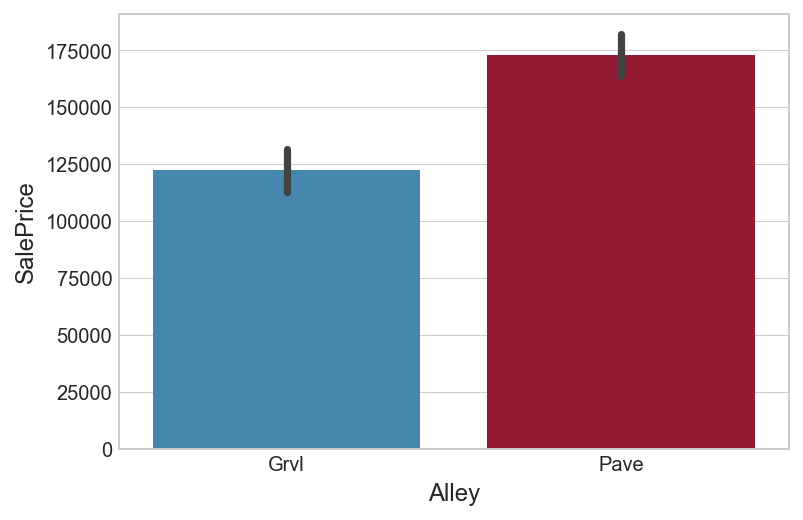

In [9]:
print(house.Alley.unique())

print(house.SalePrice.describe())
sns.barplot(x = house.Alley, y = house.SalePrice, data = house)

<b>Alley</b> will not be included, because although type of alley seems to affect price, there are only 89 non-null data points. Both types of alley (gravel and paved) are below the mean house price, which would suggest Alley access is associated with lower house value?

<b>Columns to consider</b>

SalePrice
MSSubClass
MSZoning
LotFrontage
LotArea
Street
LotShape
LandContour
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
YearBuilt
1stFlrSF
2ndFlrSF
GrLivArea
GarageType
GarageCars
GarageArea

## Conclusions after some consideration and eda

Dropping <b>GarageArea</b>, as it has high colinearity with garage cars. <br>
Keeping <b>GrLivArea</b> but not the values for 1st and 2nd floor for similar reasons. <br>
Dropping <b>Street</b> because only 4 are "Gravel". Rest are all the same. <br>
Dropping <b>MSSubClass</b> because it's a categorical variable recorded numerically and doesn't seem to have an effect on price. As seen in jointplot.<br>
Dropping <b>MSZoning</b> because most are RL.<br>
Tentatively keeping <b>YearBuilt</b>.<br>
Dropping <b>LandSlope</b> because not enough variability and seems no effect on price.<br>
Dopping Conditions 1 and 2 FOR NOW because not sure if enough variability/may be too much fuss to code at this stage.<br>
Dropping <b>LotFrontage</b> because LotArea and GrLivArea are better.<br>
<p>

    

In [10]:
house1 = house[['SalePrice', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Neighborhood', 'YrSold', 'LotArea', 'MSZoning', 'BldgType', 'HouseStyle', 'YearBuilt', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotalBsmtSF']]


####NOT DOING THIS ANYMORE
# house_dropped = house1[house1.LotArea >= 30000]


# house1 = house1[house1.LotArea < 30000]

# house_expensive = house[house.SalePrice >= 500000]



#house_expensive

#tentatively dropping houses solve for over 500000 for now.
#may undo later but they are messing up the mean.
####NOT DOING THIS ANYMORE
#house1 = house1[house1.SalePrice < 500000]

house1.head()

,SalePrice,FullBath,HalfBath,BedroomAbvGr,Neighborhood,YrSold,LotArea,MSZoning,BldgType,HouseStyle,YearBuilt,GrLivArea,GarageArea,GarageCars,TotalBsmtSF
0,208500,2,1,3,CollgCr,2008,8450,RL,1Fam,2Story,2003,1710,548,2,856
1,181500,2,0,3,Veenker,2007,9600,RL,1Fam,1Story,1976,1262,460,2,1262
2,223500,2,1,3,CollgCr,2008,11250,RL,1Fam,2Story,2001,1786,608,2,920
3,140000,1,0,3,Crawfor,2006,9550,RL,1Fam,2Story,1915,1717,642,3,756
4,250000,2,1,4,NoRidge,2008,14260,RL,1Fam,2Story,2000,2198,836,3,1145


In [11]:
#house_dropped.head(40)
#house_dropped.info()

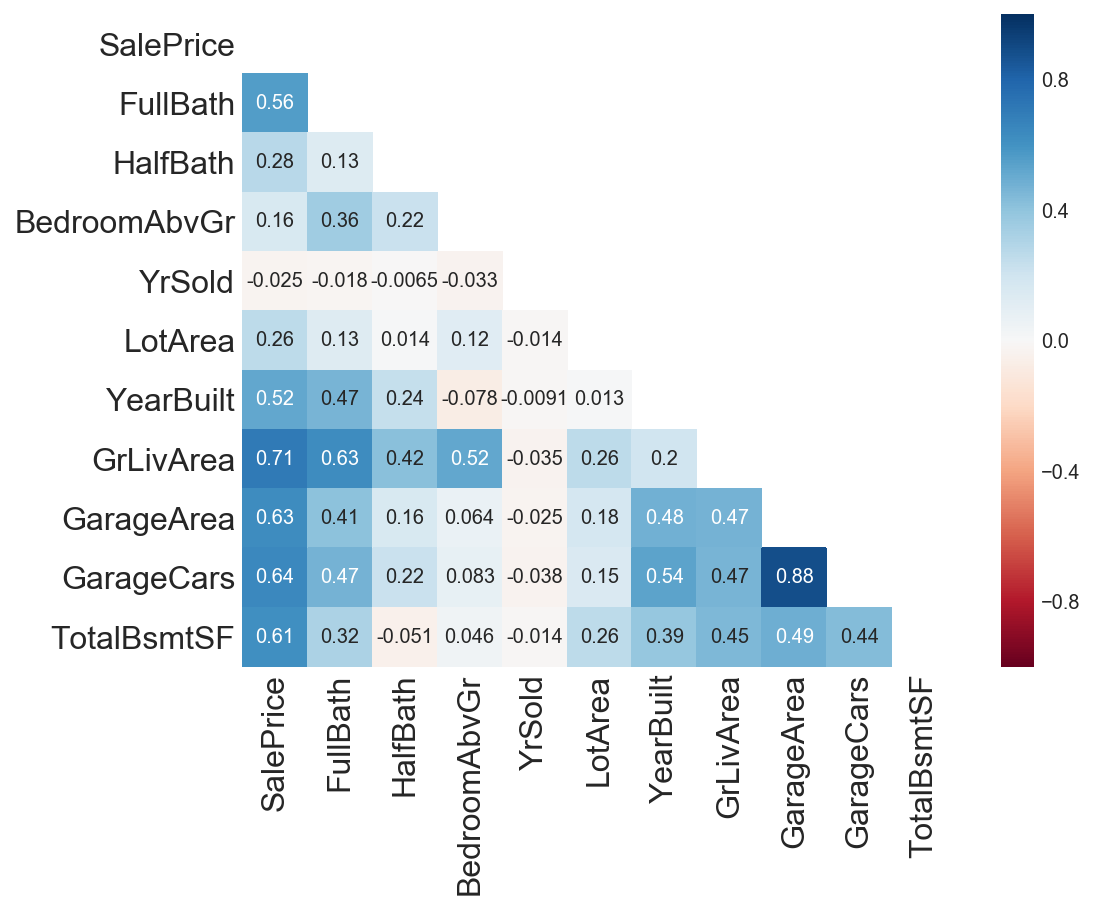

In [13]:
# change df to your DataFrame name. if needed, drop columns here.
mean_corr = house1.corr()

# Set the default matplotlib figure size to 20x14 OR WHATEVER.
fix, ax = plt.subplots(figsize=(8,6))

# Generate a mask for the upper triangle(taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask, ax=ax, annot=True, cmap='RdBu', vmin=-1, vmax=1)

# Resize and rotate the labels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=16, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=16, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

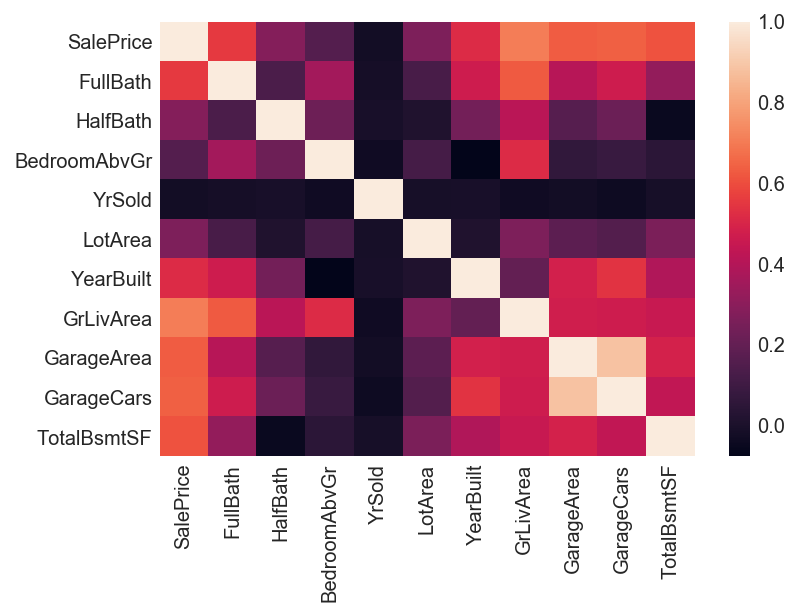

In [14]:
sns.heatmap(mean_corr)


In [15]:
# fix, ax = plt.subplots(figsize=(8,6))

# ax = sns.barplot(x = house1.Neighborhood, y = house1.SalePrice, data = house1, hue_order = house1.SalePrice )

# ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=90)
# ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)

# plt.show()

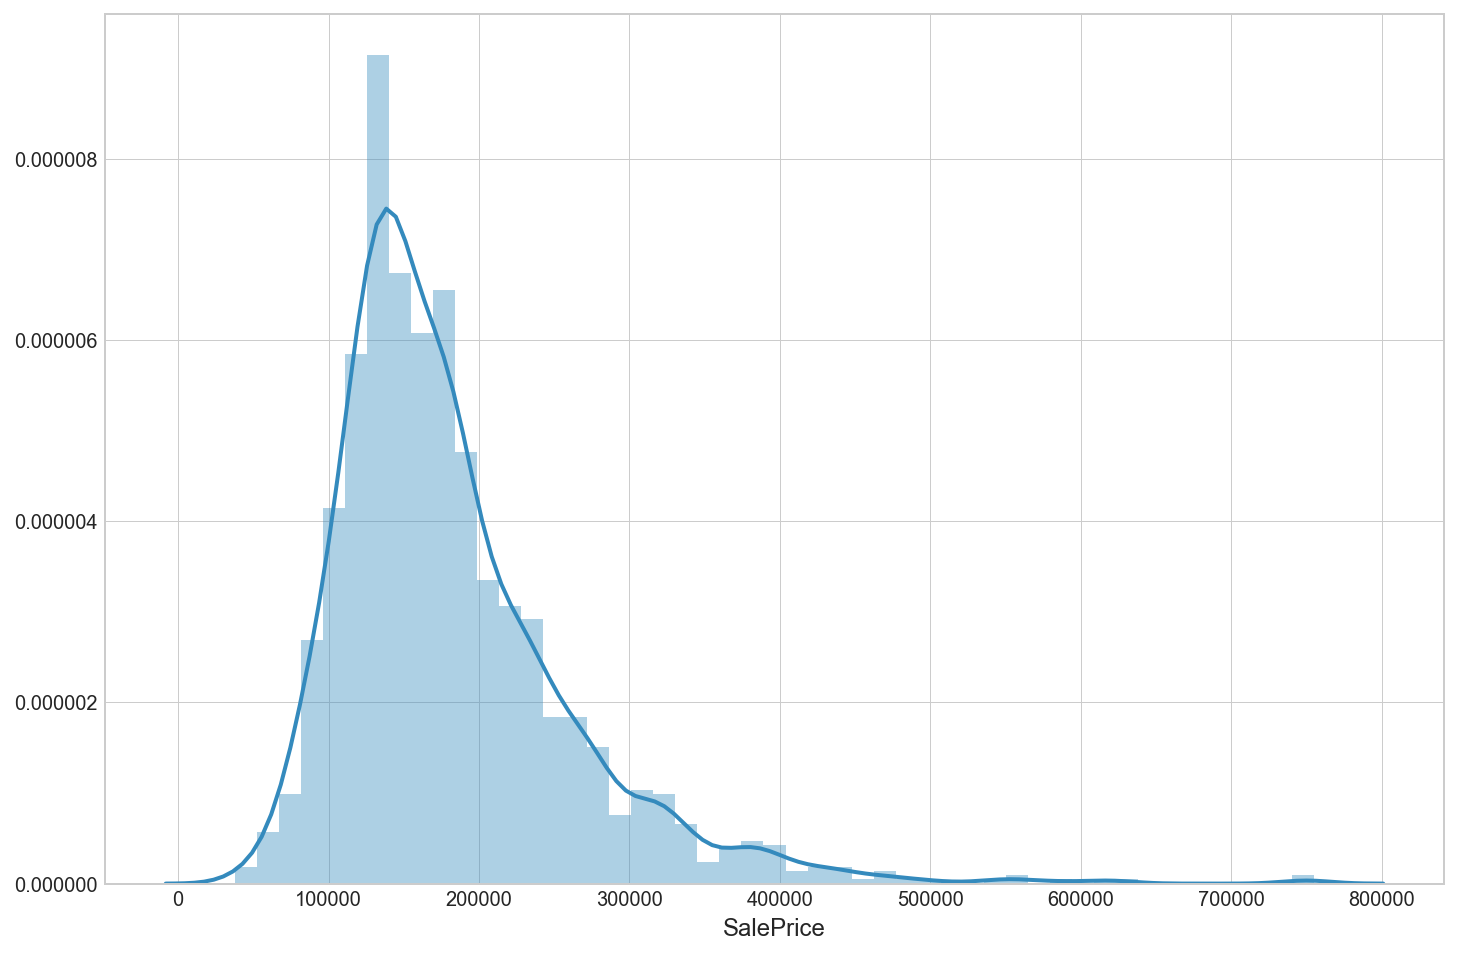

In [16]:
fix, ax = plt.subplots(figsize=(12,8))

#print(house1.SalePrice.value_counts(bins=20))

#ax = sns.distplot(house1.LotArea)

ax = sns.distplot(house1.SalePrice)


count      1450.000000
mean     181654.942069
std       79176.485241
min       37900.000000
25%      130000.000000
50%      163945.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


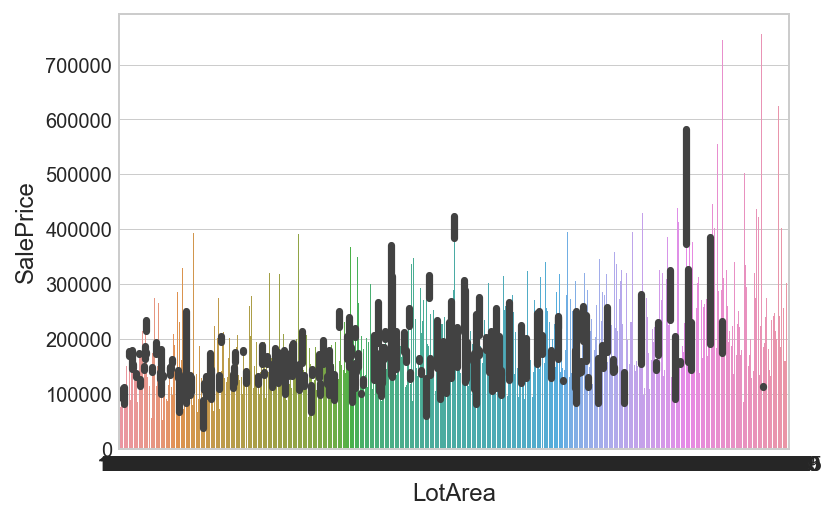

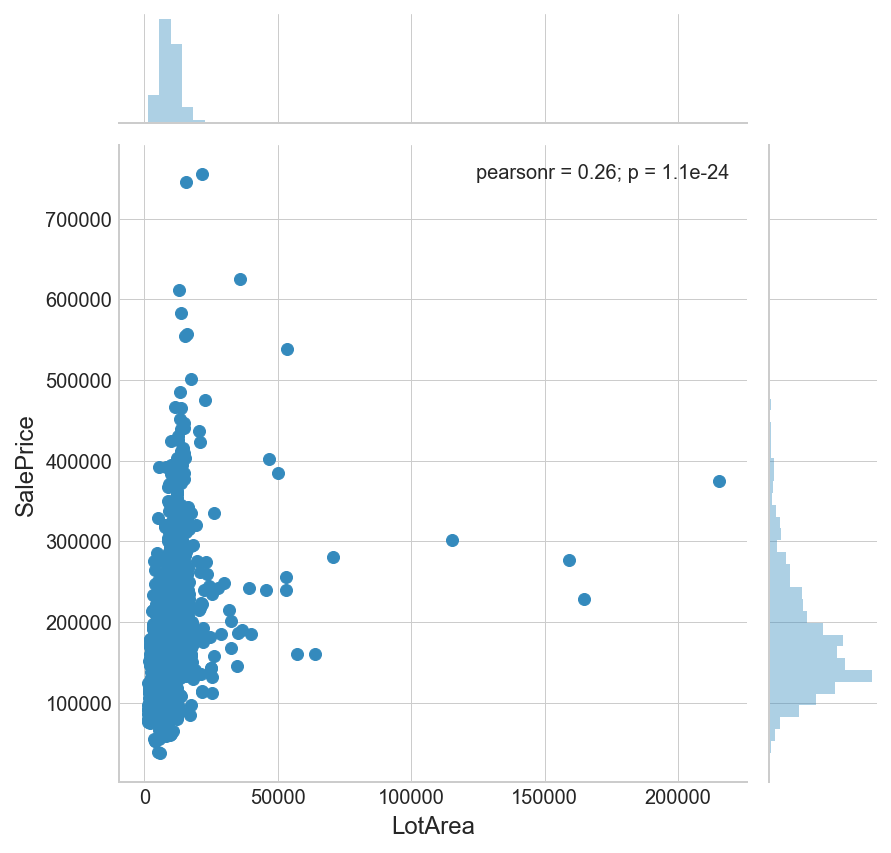

In [17]:
# print(house.MSSubClass.value_counts())

# print(house.SalePrice.describe())
# sns.barplot(x = house.MSSubClass, y = house.SalePrice, data = house)
# sns.jointplot(x = house.MSSubClass, y = house.SalePrice, data = house)

#print(house1.LotArea.value_counts())

print(house1.SalePrice.describe())
sns.barplot(x = house1.LotArea, y = house1.SalePrice, data = house1)
sns.jointplot(x = house1.LotArea, y = house1.SalePrice, data = house1)


1Fam      1211
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      30
Name: BldgType, dtype: int64
count      1450.000000
mean     181654.942069
std       79176.485241
min       37900.000000
25%      130000.000000
50%      163945.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


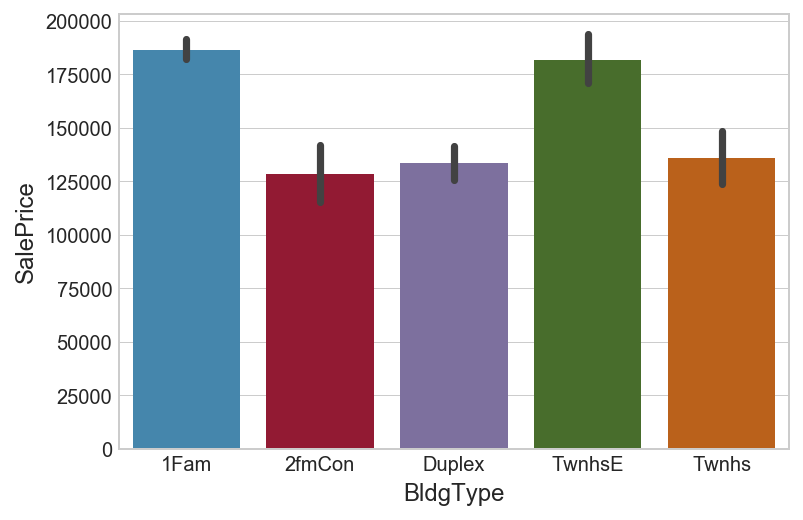

In [18]:
#house1.LotArea.value_counts()

print(house1.BldgType.value_counts())

print(house1.SalePrice.describe())
sns.barplot(x = house1.BldgType, y = house1.SalePrice, data = house1)
#sns.pairplot(house1, vars= [house1.LotShape, house1.SalePrice])



RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64
count      1450.000000
mean     181654.942069
std       79176.485241
min       37900.000000
25%      130000.000000
50%      163945.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


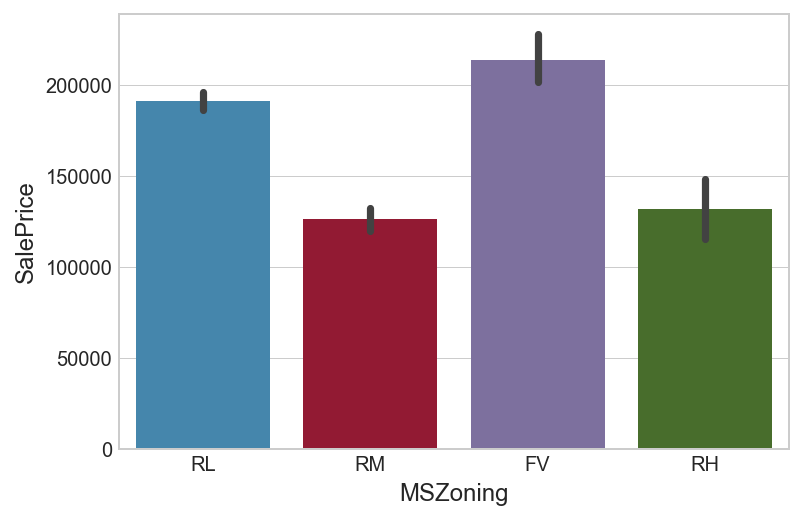

In [19]:
print(house1.MSZoning.value_counts())

print(house1.SalePrice.describe())
sns.barplot(x = house1.MSZoning, y = house1.SalePrice, data = house1)

NAmes      225
CollgCr    150
OldTown    112
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
ClearCr     28
IDOTRR      28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
count      1450.000000
mean     181654.942069
std       79176.485241
min       37900.000000
25%      130000.000000
50%      163945.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

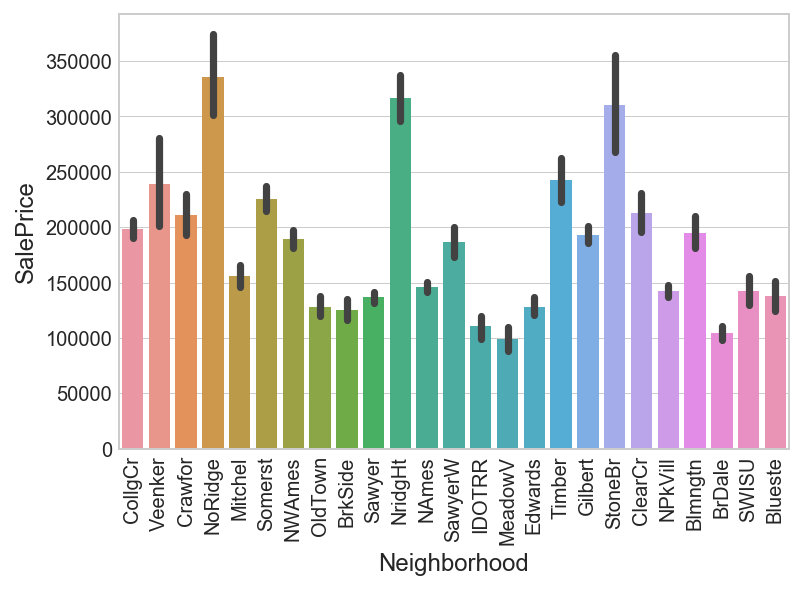

In [26]:
print(house1.Neighborhood.value_counts())

print(house1.SalePrice.describe())
ax2 = sns.barplot(x = house1.Neighborhood, y = house1.SalePrice, data = house1)
plt.xticks(rotation=90)

In [77]:
#hoods = pd.DataFrame()

# for hood in house1.Neighborhood.unique():
#     print(hood, np.mean(house1[house1.Neighborhood == hood].SalePrice))
# 
house1.groupby(['Neighborhood'])['SalePrice'].mean().rank()
# df_Grouped.rank()

house1['hoodrank'] = house1.Neighborhood.map(dict(house1.groupby(['Neighborhood'])['SalePrice'].mean().rank()))

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [86]:
# house1[['Neighborhood','hoodrank']].sort_values(by='hoodrank', ascending=False)

In [59]:
for hood in house1.Neighborhood.unique():
    print(np.mean(house1[house1.Neighborhood == hood].SalePrice))

197965.77333333335
238772.72727272726
210624.72549019608
335295.31707317074
156270.1224489796
225379.83720930232
189050.0684931507
128174.63392857143
124834.05172413793
136793.13513513515
316270.6233766234
145847.08
186555.7966101695
110471.42857142857
98576.4705882353
128219.7
242247.44736842104
192854.50632911394
310499.0
212565.42857142858
142694.44444444444
194870.88235294117
104493.75
142591.36
137500.0


## Creating the variables dummy

 BUILDING TYPE: <b>FancyHouse</b><br>
BldgType<br>
<b>1</b> for 1Fam or TwnhsE<br>
<b>0</b> otherwise<p>

 2 FLOORS: <b>TallHouse</b><br>
HouseStyle<br>
<b>1</b> for 2Story, 2.5Fin, 2.5Unf<br>
<b>0</b> otherwise<p>
    
 LOWER DENSITY: <b>LessDense</b><br>
MSZoning<br>
<b>1</b> RL, FV<br>
<b>0</b> otherwise<p>

 TOP 5 NEIGHBOURHOODS: <b>Top5</b><br>
Neighborhood<br>
<b>1</b> NoRidge, StoneBr, NridgHt, Timber, Veenker <br>
<b>0</b> otherwise<p>

In [27]:
houseD = pd.get_dummies(house1)
houseD.head()

,SalePrice,FullBath,HalfBath,BedroomAbvGr,YrSold,LotArea,YearBuilt,GrLivArea,GarageArea,GarageCars,TotalBsmtSF,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,208500,2,1,3,2008,8450,2003,1710,548,2,856,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,181500,2,0,3,2007,9600,1976,1262,460,2,1262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,223500,2,1,3,2008,11250,2001,1786,608,2,920,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,140000,1,0,3,2006,9550,1915,1717,642,3,756,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,250000,2,1,4,2008,14260,2000,2198,836,3,1145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
houseD['FancyHouse'] = houseD['BldgType_1Fam'] + houseD['BldgType_TwnhsE']
houseD['TallHouse'] = houseD['HouseStyle_2Story'] + houseD['HouseStyle_2.5Fin'] + houseD['HouseStyle_2.5Unf']
houseD['LessDense'] = houseD['MSZoning_RL'] + houseD['MSZoning_FV']
houseD['Top5'] = houseD['Neighborhood_NoRidge'] + houseD['Neighborhood_StoneBr'] + houseD['Neighborhood_NridgHt'] + houseD['Neighborhood_Timber'] + houseD['Neighborhood_Veenker']

houseD.head()

,SalePrice,FullBath,HalfBath,BedroomAbvGr,YrSold,LotArea,YearBuilt,GrLivArea,GarageArea,GarageCars,TotalBsmtSF,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,FancyHouse,TallHouse,LessDense,Top5
0,208500,2,1,3,2008,8450,2003,1710,548,2,856,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
1,181500,2,0,3,2007,9600,1976,1262,460,2,1262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1
2,223500,2,1,3,2008,11250,2001,1786,608,2,920,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
3,140000,1,0,3,2006,9550,1915,1717,642,3,756,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
4,250000,2,1,4,2008,14260,2000,2198,836,3,1145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1


In [31]:
house_final = houseD[['SalePrice', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'YrSold', 'Top5', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageArea', 'FancyHouse', 'TallHouse', 'LessDense', 'GarageCars', 'TotalBsmtSF']]

house_final.head()

,SalePrice,FullBath,HalfBath,BedroomAbvGr,YrSold,Top5,LotArea,YearBuilt,GrLivArea,GarageArea,FancyHouse,TallHouse,LessDense,GarageCars,TotalBsmtSF
0,208500,2,1,3,2008,0,8450,2003,1710,548,1,1,1,2,856
1,181500,2,0,3,2007,1,9600,1976,1262,460,1,0,1,2,1262
2,223500,2,1,3,2008,0,11250,2001,1786,608,1,1,1,2,920
3,140000,1,0,3,2006,0,9550,1915,1717,642,1,1,1,3,756
4,250000,2,1,4,2008,1,14260,2000,2198,836,1,1,1,3,1145


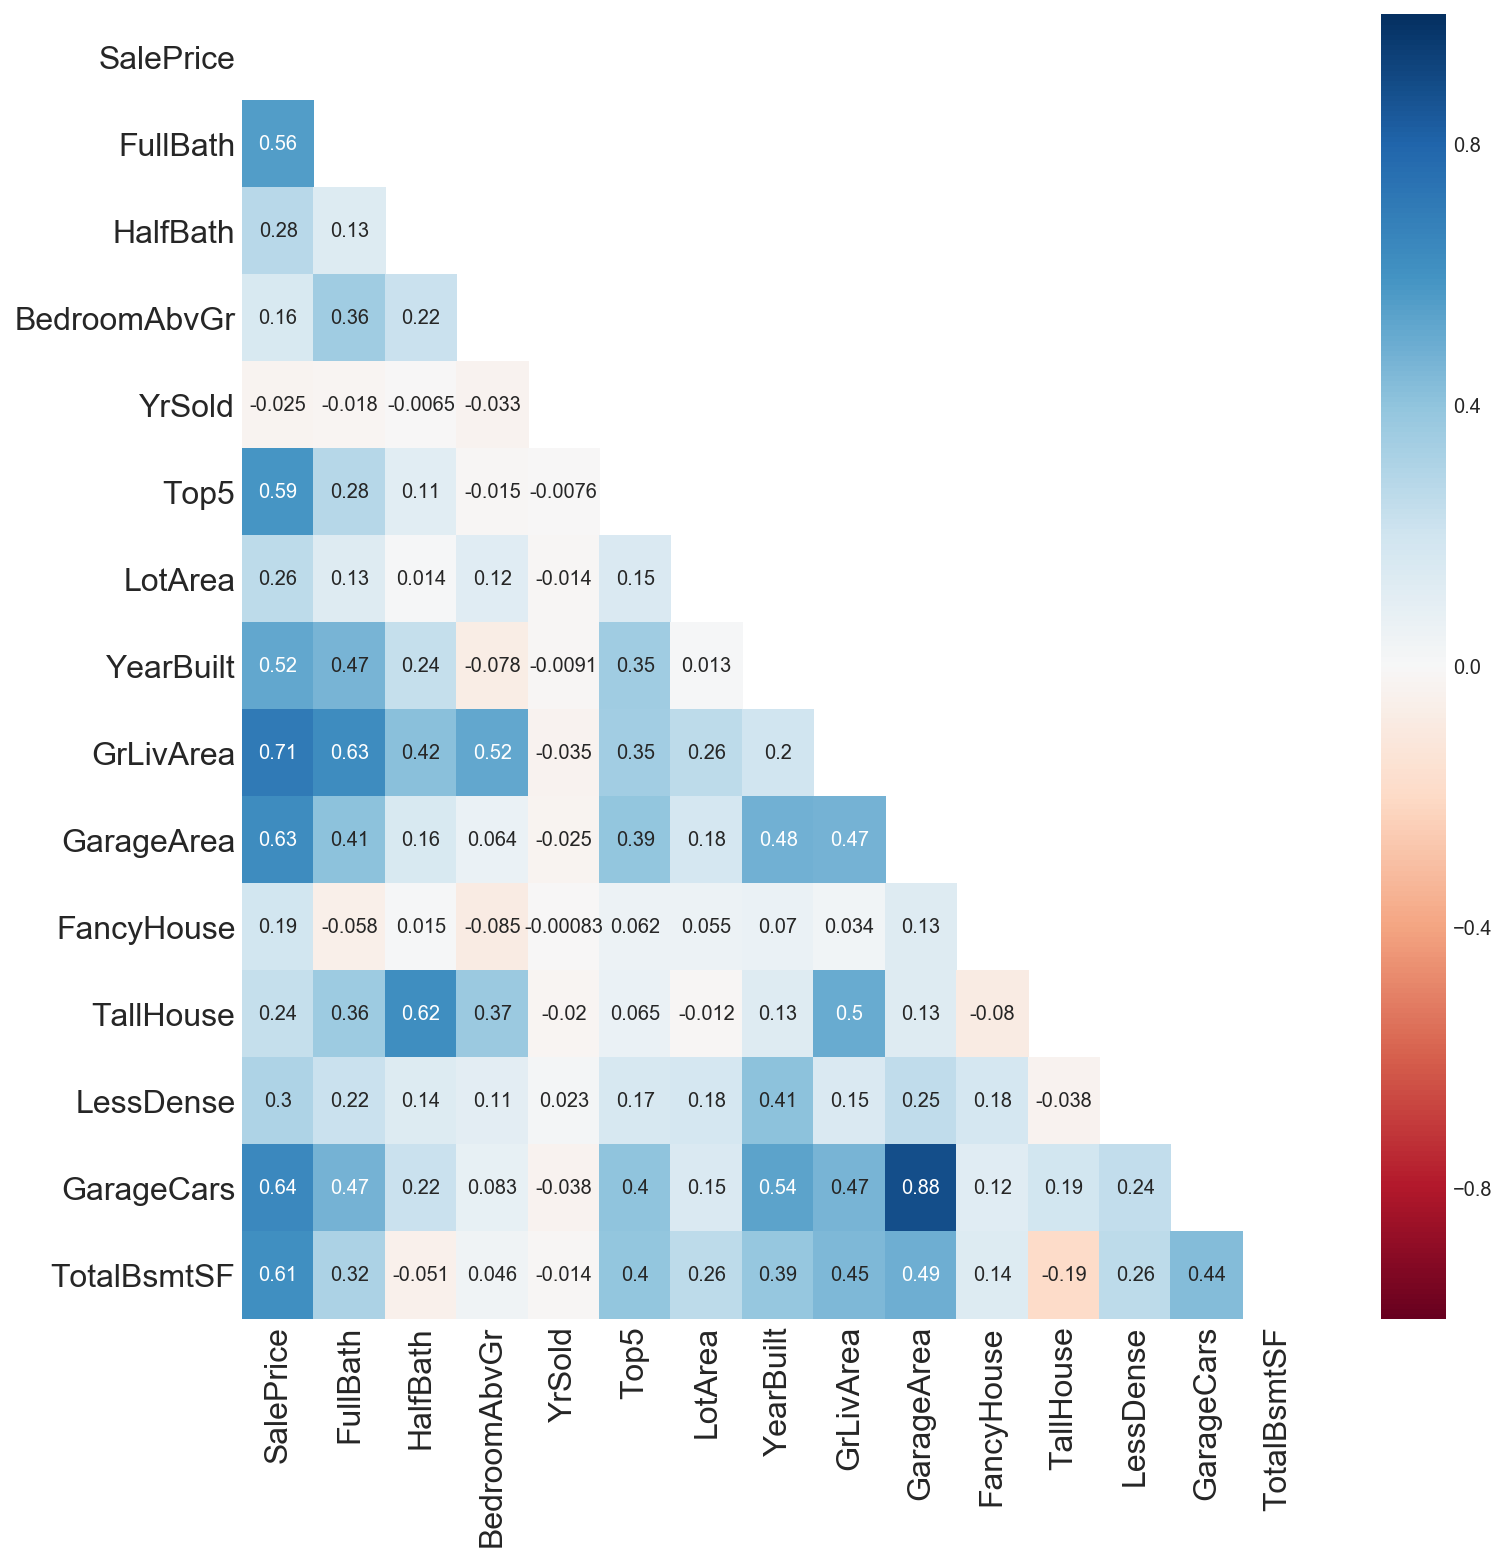

In [33]:
# change df to your DataFrame name. if needed, drop columns here.
mean_corr = house_final.corr()

# Set the default matplotlib figure size to 20x14 OR WHATEVER.
fix, ax = plt.subplots(figsize=(12,12))

# Generate a mask for the upper triangle(taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask, ax=ax, annot=True, cmap='RdBu', vmin=-1, vmax=1)

# Resize and rotate the labels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=16, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=16, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [35]:
house_final.to_csv('./house_final.csv')


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [23]:
# A:

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [24]:
# A: